## <center>Sistema massa-mola com duas massas com amortecimento viscoso</center>

<div align="right">Aluno: <b>Francisco Eudázio Suriano da Silva Júnior</b></div>

<div align="right">Professor: <b>Leandro Fleck Fadel Miguel</b></div>

<div align="right">Disciplina: <b>Análise Dinâmica de Estruturas</b></div>

Este trabalho foi desenvolvido em Python utilizando Jupyter Notebooks.

### Resumo

<div align="justify">Este trabalho buscou desenvolver e resolver o sistema de equações diferenciais de um sistema massa-mola com duas massas sob amortecimento viscoso. Para isto, foram encontradas as equações do movimento pela mecânica de Lagrange, que foram resolvidas numericamente utilizando a linguagem de programação Python. Em seguida os coeficientes de amortecimento foram alterados, de modo que foi possível observar a influência dos mesmos na resposta de deslocamentos e velocidades do sistema. Como principais resultados, observou-se que a estrutura oscila indefinidamente caso o coeficiente de atrito viscoso da primeira massa seja zero, que a resposta tende a deixar de ser oscilatória e se tornar puramente exponencial quando o amortecimento tende ao infinito, e que o movimento de uma partícula é afetado pelo movimento da outra.</div>

### 1. Introdução

<div align="justify">Na figura 1, duas massas $m_1$ e $m_2$ são ligadas por molas de constantes $k_1$ e $k_2$. A extremidade da mola à esquerda é fixada a uma base rígida. As massas estão sujeitas a amortecimento pela resistência do ar, portanto, há dois coeficientes de atrito viscoso $c_1$ e $c_2$. Conforme Castro (2018), o trabalho realizado pela força não conservativa pode assumir a forma $cx\dot{x}$.</div>

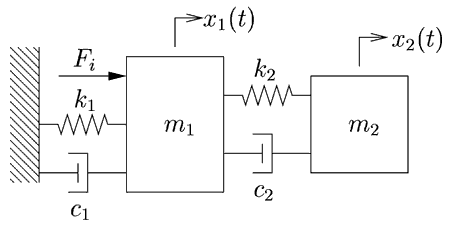<center>Figura 1: sistema dinâmico analisado - sistema de amortecimento de massa sintonizada (fonte: MIT (2017)).</center>

<div align="justify">Segundo MIT (2017), um sistema de amortecimento de massa sintonizada (<i>tuned mass damper</i> ou TMD) é um sistema de dois osciladores amortecidos acoplados no qual um oscilador é classificado como primário e o segundo como oscilador de controle. Se o sistema for calibrado corretamente, a amplitude máxima do oscilador primário em resposta a uma força externa oscilatória é reduzida e parte da energia é absorvida pelo oscilador secundário. Ainda de acordo com MIT (2017), o sistema TMD é usado em prédios altos para limitar a oscilação provocada pelo vento. Uma outra aplicação é para estabilizar mesas de laboratório suportando experimentos sensíveis a vibrações.</div>

In [1]:
# Importa as bibliotecas:
import sympy as sy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import linspace
from IPython.core.interactiveshell import InteractiveShell
from math import sin, cos, pi, degrees, radians

# Exibir múltiplos outputs por célula:
InteractiveShell.ast_node_interactivity = 'all'

# Função para calcular Euler-Lagrange:
def EL(L, q, q_):
    return sy.simplify(sy.diff(sy.diff(L, q_), t) + sy.diff(L, q))

# Variáveis do problema:
m1, m2, m, k1, k2, k, c1, c2, t = sy.symbols('m_1 m_2 m k_1 k_2 k c_1 c_2 t')

# Funções do tempo:
x1 = sy.Function('x_1')(t)
x2 = sy.Function('x_2')(t)
f = sy.Function('f')(t)

### 2. Dedução das equações pela mecânica de Lagrange

In [2]:
# Energia cinética (massas):
T = m1 * x1.diff(t)**2 / 2 + m2 * x2.diff(t)**2 / 2

# Energia potencial (molas):
V = -(k1 * x1**2 / 2 + k2 * (x2 - x1)**2 / 2)

# Forças não conservativas (atritos):
W = c1 * x1 * x1.diff(t) + c2 * (x2 - x1) * (x2.diff(t) - x1.diff(t))

# Forças externas:
F = -f * x1

# Lagrangeano:
L = T - V
print('O lagrangeano do sistema é:')
L

O lagrangeano do sistema é:


k_1*x_1(t)**2/2 + k_2*(-x_1(t) + x_2(t))**2/2 + m_1*Derivative(x_1(t), t)**2/2 + m_2*Derivative(x_2(t), t)**2/2

In [3]:
# Aplicando a equação de Euler-Lagrange para x1 e x2 e adicionando as forças não conservativas:
EDx1 = EL(L, x1, x1.diff(t)) + W.diff(x1) + F.diff(x1)
EDx2 = EL(L, x2, x2.diff(t)) + W.diff(x2) + F.diff(x2)

print('\nO sistema de equações diferenciais que modela o problema é:')
sy.simplify(EDx1)
sy.simplify(EDx2)


O sistema de equações diferenciais que modela o problema é:


c_1*Derivative(x_1(t), t) + c_2*(Derivative(x_1(t), t) - Derivative(x_2(t), t)) + k_1*x_1(t) + k_2*(x_1(t) - x_2(t)) + m_1*Derivative(x_1(t), (t, 2)) - f(t)

-c_2*(Derivative(x_1(t), t) - Derivative(x_2(t), t)) - k_2*(x_1(t) - x_2(t)) + m_2*Derivative(x_2(t), (t, 2))

<div align="justify">O sistema também pode ser escrito em formato matricial: $\textbf{M} \ddot{\textbf{X}} + \textbf{C}\dot{\textbf{X}} + \textbf{KX} = \textbf{F}$</div>

In [4]:
# Vetores:
x__ = sy.Matrix([[x1.diff(t, 2)], [x2.diff(t, 2)]]).T
x_ = sy.Matrix([[x1.diff(t)], [x2.diff(t)]]).T
x = sy.Matrix([[x1], [x2]]).T
F = sy.Matrix([[f], [0]]).T

# Matrizes:
M = sy.Matrix([[m1, 0], [0, m2]])
C = sy.Matrix([[c1 + c2, -c2], [-c2, c2]])
K = sy.Matrix([[k1 + k2, -k2], [-k2, k2]])

print('Matriz M:')
M
print('\nMatriz C:')
C
print('\nMatriz K:')
K

# Sistema:
Eqs = x__ * M + x_ * C + x * K - F

Matriz M:


Matrix([
[m_1,   0],
[  0, m_2]])


Matriz C:


Matrix([
[c_1 + c_2, -c_2],
[     -c_2,  c_2]])


Matriz K:


Matrix([
[k_1 + k_2, -k_2],
[     -k_2,  k_2]])

In [5]:
# Verificando se as equações são iguais:
sy.simplify(EDx1 - Eqs[0])
sy.simplify(EDx2 - Eqs[1])

0

0

Reorganizando:

$m_1 \ddot{x_1} + c_1 \dot{x_1} +  k_1 x_1 - c_2(\dot{x_2} - \dot{x_1}) - k_2 (x_2 - x_1) = f(t)$

$m_2 \ddot{x_2} + c_2(\dot{x_2} - \dot{x_1}) + k_2 (x_2 - x_1) = 0$

Comparando com as equações do MIT (2017):

$m_1 \ddot{x_1} + b_1 \dot{x_1} +  k_1 x_1 - b_2(\dot{x_2} - \dot{x_1}) - k_2 (x_2 - x_1) = f_1(t)$

$m_2 \ddot{x_2} + b_2(\dot{x_2} - \dot{x_1}) + k_2 (x_2 - x_1) = 0$

<div align="justify">Fazendo $f_1(t) = f(t)$ e $b_n = c_n$, o sistema de equações encontrado está coerente com o sistema dado em MIT (2017). As matrizes e equações encontradas também estão de acordo com o apresentado em Yang <i>et al</i>. (2021) e Silva (2009).</div>

### 3. Solução numérica de EDOs usando a biblioteca SciPy

<div align="justify">Esta seção é dedicada à apresentação da estratégia de solução utilizando o Python e à validação da rotina numérica empregada. Como exemplo, será reproduzida a solução do sistema massa-mola mostrado na figura 2, extraído do exemplo 5.4 de Silva (2009).</div>

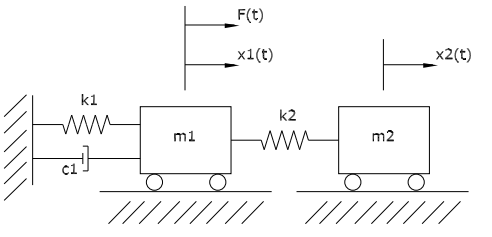<center>Figura 2: sistema massa-mola apresentado em Silva (2009) (fonte: Silva (2009)).</center>

<div align="justify">Segundo Silva (2009), considerou-se que m1 = 1, m2 = 2, k1 = k2 = 100, c1 = 2, as condições iniciais nulas e a força de excitação na massa 1 igual a $10sen(10t)$, com as unidades todas no SI.</div>

<div align="justify">As equações diferenciais que modelam o sistema são as mesmas encontradas neste trabalho. Considerando $c_2$ = 0:</div>

$m_1 \ddot{x_1} + c_1 \dot{x_1} +  k_1 x_1 - k_2 (x_2 - x_1) = f(t)$

$m_2 \ddot{x_2} + k_2 (x_2 - x_1) = 0$

<div align="justify">Para resolvê-lo numericamente utilizando os solvers da biblioteca SciPy do Python, segundo a documentação do SciPy (2009), é necessário primeiro convertê-lo em um sistema de EDOs de primeira ordem. Para isto, são introduzidas duas novas variáveis:</div>

$y_1 = \dot{x_1}$

$y_2 = \dot{x_2}$

<div align="justify">Onde $y_1$ e $y_2$ são as velocidades das massas. Dessa forma, é possível reescrever o sistema de duas equações de segunda ordem em um sistema de quatro equações de primeira ordem.</div>

$\dot{x_1} = v_1$

$\dot{x_2} = v_2$

$\displaystyle\dot{v_1} = \frac{f(t) - (c_1 \dot{x_1} +  k_1 x_1 - k_2 (x_2 - x_1))}{m_1}$

$\displaystyle\dot{v_2} = \frac{-(k_2 (x_2 - x_1))}{m_2}$

<div align="justify">Este sistema agora pode ser implementado no SciPy. A solução de um sistema de EDOs pelo SciPy requer a definição de uma função que recebe as variáveis (funções $x$ a serem calculadas), o vetor com os pontos de avaliação das funções (neste caso o vetor tempo com os pontos de interesse) e o vetor com os parâmetros conhecidos do sistema.</div>

<div align="justify">A seguir o exemplo será resolvido utilizando os mesmos parâmetros e condições iniciais utilizados por Silva (2009).</div>

In [6]:
def exemplo(w, t, p):
    """
    Define as equações diferenciais do problema.
    Argumentos:
        w :  vetor das variáveis (funções) a serem determinadas:
                  w = [x1, y1, x2, y2]
        t :  tempo
        p :  vetor dos parâmetros do problema:
                  p = [m1, m2, k1, k2, c1, F0, omega]
    """
    x1, v1, x2, v2 = w
    m1, m2, k1, k2, c1, F0, omega = p
    
    f = [v1,
         (F0 * sin(omega * t) - (c1 * v1 + k1 * x1 - k2 * (x2 - x1))) / m1,
         v2,
         -(k2 * (x2 - x1)) / m2]
    return f

In [7]:
# Parâmetros do modelo:
m1 = 1     # Massa 1
m2 = 2     # Massa 2
k1 = 100   # Constante da mola 1
k2 = 100   # Constante da mola 2
c1 = 2     # Coeficiente de atrito da massa 1

# Força externa:
F0 = 10    # Amplitude
omega = 10 # Frequência

# Condições iniciais (unidades no SI):
x1 = 0     # Deslocamento inicial da massa 1
v1 = 0     # Velocidade inicial da massa 1
x2 = 0     # Deslocamento inicial da massa 2
v2 = 0     # Velocidade inicial da massa 2

# Parâmetros do solver:
abserr = 1e-8    # Tolerância absoluta
relerr = 1e-6    # Tolerância relativa
stoptime = 7.2   # Tempo final
numpoints = 1000 # Número de pontos de integração

# Cria o eixo x (intervalo de tempo) para a solução:
t = linspace(0, stoptime, numpoints)

In [8]:
# Cria listas com os parâmetros e as condições iniciais:
p = [m1, m2, k1, k2, c1, F0, omega]
w0 = [x1, v1, x2, v2]

# Solução:
wsol = odeint(exemplo, w0, t, args=(p, ), atol=abserr, rtol=relerr)

<div align="justify">A solução encontrada para as duas massas é armazenada em um vetor <i>numpy</i>. Os valores são armazenados na ordem definida na variável <i>w0</i>, ou seja, seguem a ordem $[x_1, v_1, x_2, v_2]$, $[x_1, v_1, x_2, v_2]$...</div>

In [9]:
wsol

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.21386353e-06,  2.58138998e-03,  8.24523205e-10,
         5.62848132e-07],
       [ 4.94056465e-05,  1.02362881e-02,  2.58137430e-08,
         8.92252384e-06],
       ...,
       [ 3.52135366e-02, -4.76583253e-01, -4.19206293e-03,
         3.61824120e-01],
       [ 3.17137890e-02, -4.94201674e-01, -1.53578592e-03,
         3.74921732e-01],
       [ 2.80956704e-02, -5.09418951e-01,  1.20679936e-03,
         3.85763101e-01]])

Para armazenar cada um desses resultados em uma lista individual:

In [10]:
# Converte a solução em listas:
x1_sol = [wsol[i][0] for i in range(len(wsol))]
x2_sol = [wsol[i][2] for i in range(len(wsol))]
v1_sol = [wsol[i][1] for i in range(len(wsol))]
v2_sol = [wsol[i][3] for i in range(len(wsol))]

Por fim, pode-se plotar a solução encontrada. O código a seguir exibe os resultados de $x_1$ e $x_2$ para o intervalo analisado.

In [11]:
# Desabilita os múltiplos outputs por célula
InteractiveShell.ast_node_interactivity = 'last_expr'

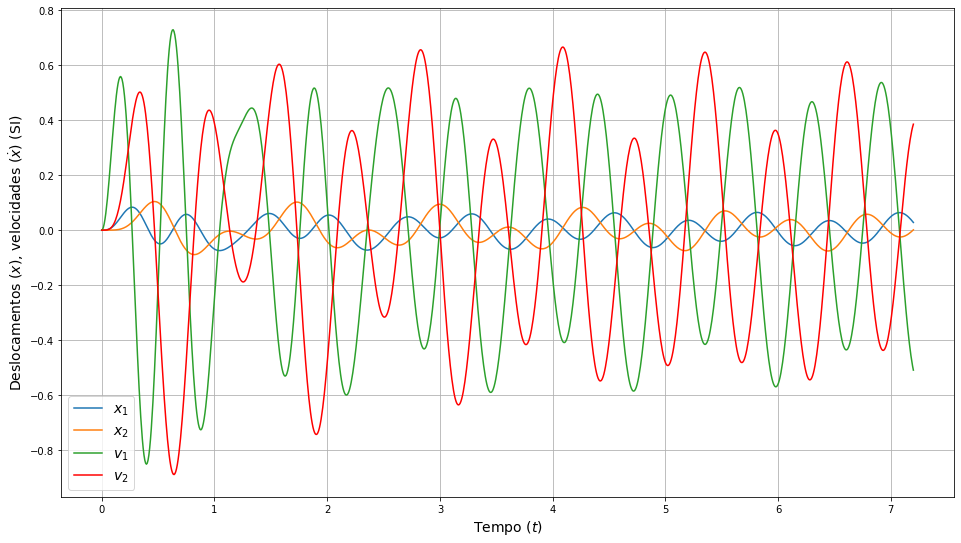

In [12]:
# Plota a solução encontrada:
plt.rc('figure', figsize=(16, 9))
plt.plot(t, x1_sol, label=r'$x_1$')
plt.plot(t, x2_sol, label=r'$x_2$')
plt.plot(t, v1_sol, label=r'$v_1$')
plt.plot(t, v2_sol, label=r'$v_2$', c='r')
plt.xlabel(r'Tempo ($t$)', fontsize=14)
plt.ylabel(r'Deslocamentos ($x$), velocidades ($\dot{x}$) (SI)', fontsize=14)
plt.grid()
#plt.axis([0, 8, -1, 1])
plt.legend(fontsize=14)
plt.show()

<center>Figura 3: resultados do solver para o exemplo.</center>

<div align="justify">O algoritmo utilizado no solver do SciPy é chamado de LSODA, que resolve sistemas de equações diferenciais acopladas de primeira ordem com equações no formato $\frac{dy}{dt} = f$. O algoritmo apresenta a desvantagem de que a solução é numérica e para apenas alguns pontos do domínio, não sendo possível obter diretamente as funções contínuas $x_1(t)$ e $x_2(t)$. No exemplo, os pontos avaliados foram os 1000 valores de 0 a 7,2 contidos no intervalo definido na variável <i>t</i>. Os resultados deste trabalho e os de Silva (2009) foram sobrepostos na figura 4, onde se constatou que os resultados são idênticos aos encontrados por Silva (2009), validando o programa utilizado.</div>

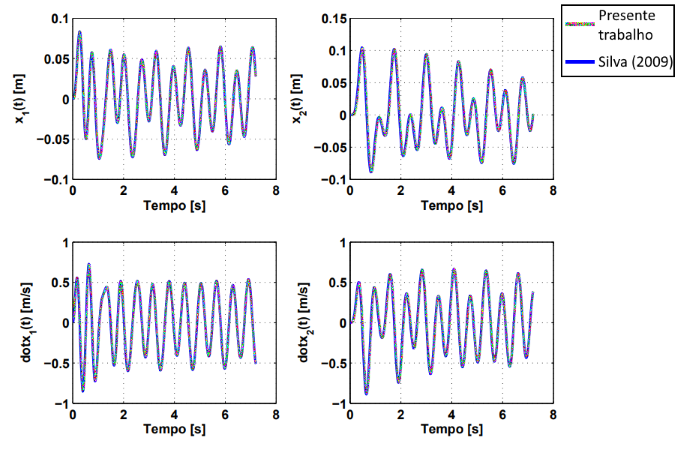<center>Figura 4: solução do presente trabalho e solução encontrada por Silva (2009) (fonte: adaptado de Silva (2009)).</center>

In [13]:
# Para evitar repetição do código, será definida a função a seguir:
def resolve_e_plota(sistema, vel):
    # Cria o eixo x (intervalo de tempo) para a solução:
    t = linspace(0, stoptime, numpoints)
    
    # Cria listas com os parâmetros e as condições iniciais:
    p = [m1, m2, k1, k2, c1, c2, F0, omega]
    w0 = [x1, v1, x2, v2]

    # Solução:
    wsol = odeint(sistema, w0, t, args=(p, ), atol=abserr, rtol=relerr)
    x1_sol = [wsol[i][0] for i in range(len(wsol))]
    x2_sol = [wsol[i][2] for i in range(len(wsol))]
    
    # Plotagem:
    plt.rc('figure', figsize=(16, 9))
    plt.plot(t, x1_sol, label=r'$x_1$')
    plt.plot(t, x2_sol, label=r'$x_2$')
    if vel == True:
        v1_sol = [wsol[i][1] for i in range(len(wsol))]
        v2_sol = [wsol[i][3] for i in range(len(wsol))]
        plt.plot(t, v1_sol, label=r'$v_1$')
        plt.plot(t, v2_sol, label=r'$v_2$')
        plt.ylabel(r'Deslocamentos ($x$), velocidades ($\dot{x}$) (SI)', fontsize=14)
    else:
        plt.ylabel(r'Deslocamentos ($x$) (SI)', fontsize=14)
    plt.xlabel(r'Tempo ($t$) (SI)', fontsize=14)
    plt.grid()
    plt.legend(fontsize=14)
    plt.show()

### 4. Solução do problema proposto

As equações do sistema massa-mola deste trabalho são:

$m_1 \ddot{x_1} + c_1 \dot{x_1} +  k_1 x_1 - c_2(\dot{x_2} - \dot{x_1}) - k_2 (x_2 - x_1) = f(t)$

$m_2 \ddot{x_2} + c_2(\dot{x_2} - \dot{x_1}) + k_2 (x_2 - x_1) = 0$

Considerando:

$\dot{x_1} = v_1$

$\dot{x_2} = v_2$

<div align="justify">Substituindo e dividindo a primeira equação do movimento por $m_1$ e a segunda por $m_2$ e reorganizando:</div>

$\displaystyle\dot{v_1} = \frac{f(t) - (c_1 \dot{x_1} +  k_1 x_1 - c_2(\dot{x_2} - \dot{x_1}) - k_2 (x_2 - x_1))}{m_1}$

$\displaystyle\dot{v_2} = \frac{-(c_2(\dot{x_2} - \dot{x_1}) + k_2 (x_2 - x_1))}{m_2}$

<div align="justify"><b>OBS:</b> as equações do movimento para o sistema analisado foram encontradas para o caso de vibrações forçadas com força atuando na partícula 1. No entanto, para melhor visualização e discussão dos resultados, a partir de agora a força externa será considerada igual a 0, configurando um sistema em vibrações livres. Portanto, serão necessárias condições iniciais para que o sistema entre em movimento.</div>

Implementando as equações no código:

In [14]:
def EDOs(w, t, p):
    x1, v1, x2, v2 = w                    # Variáveis do problema
    m1, m2, k1, k2, c1, c2, F0, omega = p # Parâmetros

    # Cria as equações f = (x1', v1', x2', v2'):
    f = [v1,
         (F0 * sin(omega * t) - (c1 * v1 + k1 * x1 - c2 * (v2 - v1) - k2 * (x2 - x1))) / m1,
         v2,
         -(c2 * (v2 - v1) + k2 * (x2 - x1)) / m2]
    
    # Retorna as EDs
    return f

In [15]:
# Parâmetros (unidades no SI):
m1 = 2   # Massa 1
m2 = 1   # Massa 2
k1 = 15  # Constante da mola 1
k2 = 40  # Constante da mola 2
c1 = 0.7 # Coeficiente de amortecimento da massa 1
c2 = 0.4 # Coeficiente de amortecimento da massa 2

# Força externa:
F0 = 0    # Amplitude
omega = 0 # Frequência

# Condições iniciais (unidades no SI):
x1 = 0   # Deslocamento inicial da massa 1
v1 = 0   # Velocidade inicial da massa 1
x2 = 0.5 # Deslocamento inicial da massa 2
v2 = 0   # Velocidade inicial da massa 2

# Parâmetros do solver:
abserr = 1e-8    # Tolerância absoluta
relerr = 1e-6    # Tolerância relativa
stoptime = 25    # Tempo final
numpoints = 1000 # Número de pontos de integração

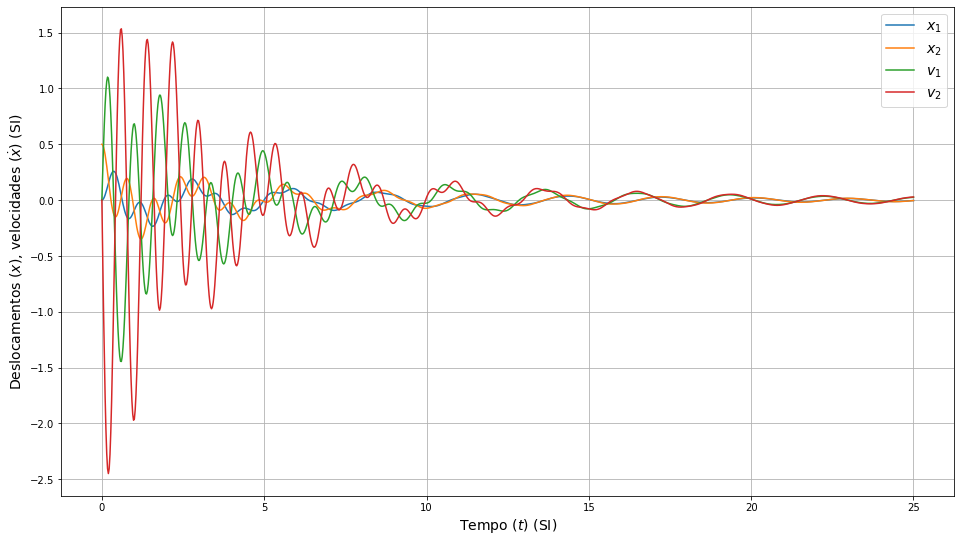

In [16]:
# Solução:
resolve_e_plota(EDOs, vel=True)

<center>Figura 5: deslocamentos e velocidades do sistema para os parâmetros e condições estipulados.</center>

<div align="justify">Observa-se na figura 5 que a presença do amortecimento provoca um decaimento exponencial tanto nas velocidades quanto nos deslocamentos. Conforme o esperado, o movimento do sistema tende a cessar após algum tempo.</div>

<div align="justify">Como a força externa foi considerada nula, o problema analisado foi o de vibrações livres. Portanto, o sistema somente pode entrar em movimento através da aplicação de condições iniciais (neste caso foi aplicado um deslocamento igual a 0,5 m na massa 2, como também pode ser observado no gráfico).</div>

### 5. Influência do amortecimento no movimento das massas

<div align="justify">Para investigar a influência do amortecimento na resposta do sistema, foram analisadas as seguintes situações:</div>

+ Caso 1: $c_1$ = 0 e $c_2$ = 0,4;

+ Caso 2: $c_1$ = 0,7 e $c_2$ = 0;

+ Caso 3: $c_1$ = 0 e $c_2$ = 0;

+ Caso 4: $c_1$ = 1000 e $c_2$ = 1000.

**5.1 Caso 1: amortecimento somente na segunda massa**

In [17]:
# Parâmetros:
c1 = 0        # Coeficiente de amortecimento da massa 1
c2 = 0.4      # Coeficiente de amortecimento da massa 2
stoptime = 50 # Tempo final

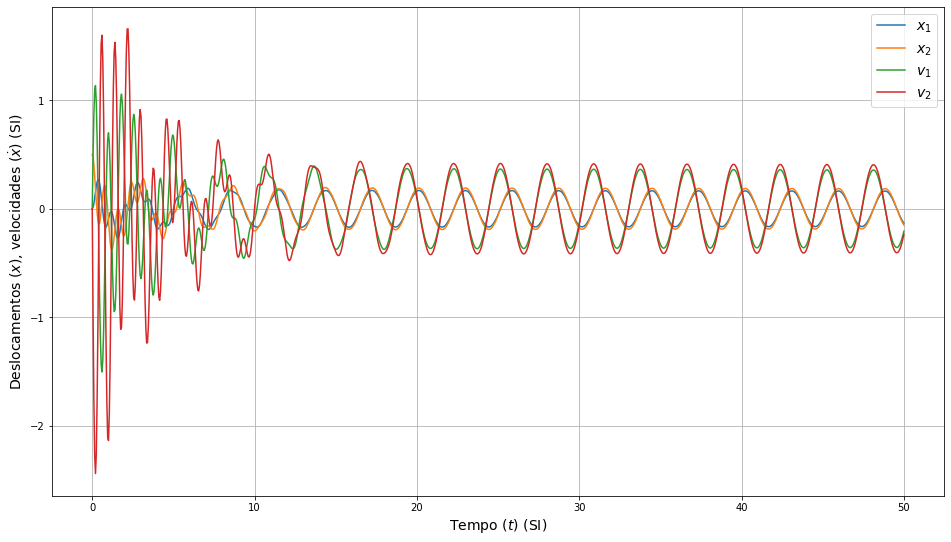

In [18]:
# Solução:
resolve_e_plota(EDOs, vel=True)

<center>Figura 6: resposta sem amortecimento na massa 1.</center>

<div align="justify">Pela figura 6, observa-se que a estrutura, após se zerar $c_1$ e apesar de ainda haver amortecimento na massa 2, tende a oscilar indefinidamente após algum tempo, com $x_1$ e $x_2$ apresentando amplitudes aproxidamente iguais à condição inicial imposta (0,5 m). Isto se deve ao fato de a massa 1 permanecer em movimento em relação ao referencial estático (neste caso a base rígida onde a mola de constante $k_1$ está fixada, ver figura 1). O movimento da massa 2 em relação à massa 1 cessa, pois $c_2$ não é zero. Porém, o movimento da massa 1 em relação ao referencial estático permanece, pois não há mecanismo de dissipação de energia. Conforme as equações encontradas, o movimento da massa 2 depende também de $x_1$. Desta forma, ambas as partículas permanecem oscilando indefinidamente.</div>

**5.2 Caso 2: amortecimento somente na primeira massa**

In [19]:
# Parâmetros:
c1 = 0.7      # Coeficiente de amortecimento da massa 1
c2 = 0        # Coeficiente de amortecimento da massa 2
stoptime = 50 # Tempo final

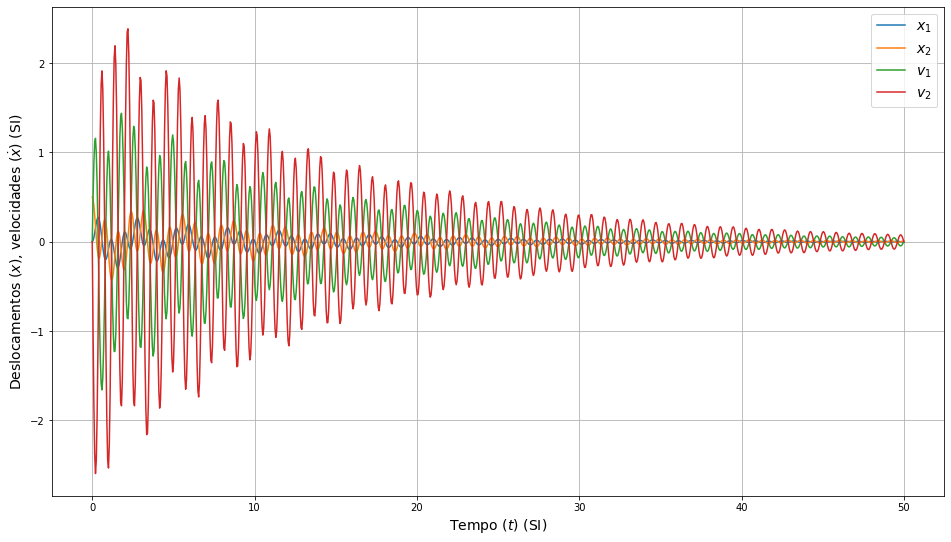

In [20]:
# Solução:
resolve_e_plota(EDOs, vel=True)

<center>Figura 7: resposta sem amortecimento na massa 2.</center>

<div align="justify">Sem amortecimento na massa 2, pela figura 7 é possível observar um decaimento mais lento do movimento em relação ao caso onde ambas as massas possuem amortecimento. Diferente da situação observada na figura 6, onde a estrutura tende a oscilar indefinidamente, neste caso o movimento tende a cessar. A explicação para este fenômeno é que o movimento da partícula 1 depende de $c_1$ e $c_2$. Como $c_1$ não é zero, o decaimento exponencial, apesar de menor, ainda existe, tendendo a interromper seu movimento. Já o movimento da partícula 2, apesar de não depender do coeficiente $c_1$, depende do deslocamento $x_1$. Como este tende a reduzir com o tempo, o movimento da massa 2 também diminui.</div>

**5.3 Caso 3: sem amortecimento**

In [21]:
# Parâmetros:
c1 = 0        # Coeficiente de amortecimento da massa 1
c2 = 0        # Coeficiente de amortecimento da massa 2
stoptime = 25 # Tempo final

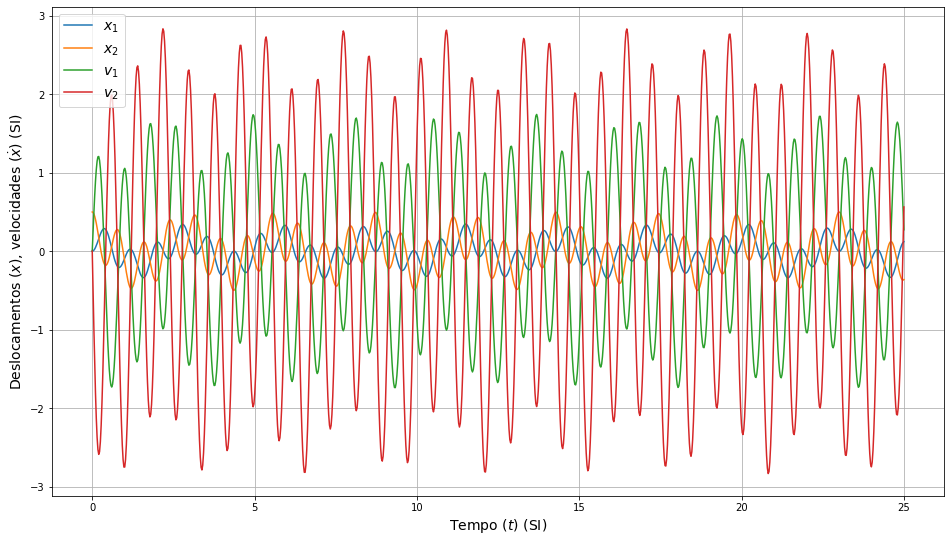

In [22]:
# Solução:
resolve_e_plota(EDOs, vel=True)

<center>Figura 8: resposta sem amortecimento nas duas massas.</center>

<div align="justify">Como esperado, considerando os coeficientes de amortecimento iguais a 0 para ambas as massas, recupera-se a solução do caso não amortecido. As massas oscilam indefinidamente pois não há nenhum mecanismo de dissipação da energia.</div>

**5.4 Caso 4: amortecimento tendendo ao infinito**

In [23]:
# Parâmetros:
c1 = 1e3       # Coeficiente de amortecimento da massa 1
c2 = 1e3       # Coeficiente de amortecimento da massa 2
x1 = -0.25     # Posição inicial da massa 1
stoptime = 300 # Tempo final

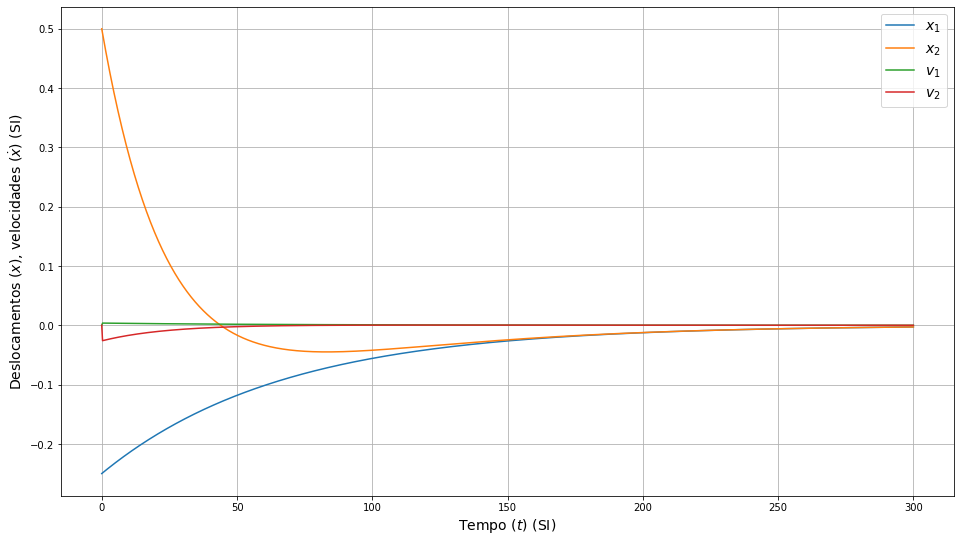

In [24]:
# Solução:
resolve_e_plota(EDOs, vel=True)

<center> Figura 9: resposta do sistema com amortecimento tendendo ao infinito.</center>

<div align="justify">Por fim foi observada a resposta considerando atrito viscoso tendendo ao infinito (neste caso considerou-se $c_1$ = $c_2$ = 1000). Foi alterada a condição inicial da massa 1 para -0,25 para melhor visualização dos resultados. Neste caso o sistema praticamente não oscila. Observando a figura 9, as massas simplesmente deixam a posição inicial e retornam ao repouso, lentamente, sendo possível observar claramente o decaimento exponencial.</div>

### 6. Conclusões

<div align="justify">No presente trabalho realizou-se a análise de um sistema dinâmico massa-mola com dois graus de liberdade. Inicialmente foram deduzidas as equações que modelam o sistema através da mecânica de Lagrange, que foram validadas através da comparação com outros trabalhos. Em seguida, foi obtida a solução numérica das equações para 1000 pontos de integração. O procedimento numérico também foi validado com os resultados de outro trabalho. Por fim foram resolvidas novamente as equações, analisando a influência do amortecimento no sistema. Algumas conclusões foram tiradas:</div>

+ <div align="justify">O trabalho gerado pelas forças não conservativas e pelas forças externas não entra no cálculo do lagrangeano;</div>

+ <div align="justify">O sistema de duas equações diferenciais de segunda ordem pôde ser reescrito na forma de quatro EDOs de primeira ordem, possibilitando a solução no programa;</div>

+ <div align="justify">As equações obtidas também servem para modelar o caso não amortecido e o caso em vibrações livres;</div>

+ <div align="justify">O programa desenvolvido pode ser alterado para diferentes parâmetros e condições iniciais;</div>

+ <div align="justify">O sistema oscila indefinidamente caso $c_1$ seja zero, pois não há dissipação de energia em relação ao referencial estático;</div>
    
+ <div align="justify">O movimento de ambas as partículas é afetado pelo movimento da outra;</div>

+ <div align="justify">Quando o amortecimento tende ao infinito a resposta do sistema tende a se tornar puramente exponencial, em vez de oscilatória.</div>

### <div align="justify">Referências

<div align="justify">Ault, J.; Bower, A.; Qi, Yue. <b>Introduction to vibration of systems with many degrees of freedom</b>. School of Engineering, Brown University. Disponível em: https://www.brown.edu/Departments/Engineering/Courses/En4/Notes/vibrations_mdof/vibrations_mdof.htm, acesso em 15/09/2021.</div>
<p>
<div align="justify">Castro, R. <b>Apostila de Vibrações Mecânicas</b>. Rio de Janeiro, RJ, 2018.</div>
<p>
<div align="justify">Massachusetts Institute of Technology (MIT). <b>18.031 - System Functions And The Laplace Transform</b>. Cambridge, MA, 2017.</div>
<p>
<div align="justify">Miguel, L. F. F. <b>Análise Dinâmica de Estruturas</b>. Florianópolis, SC, 2021.</div>
<p>
<div align="justify">SciPy. <b>Coupled spring-mass system</b>. Disponível em: https://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html, acesso em 15/09/2021.</div>
<p>
<div align="justify">Silva, S. <b>Vibrações Mecânicas - Notas de Aulas - 2ª Versão</b>. Foz do Iguaçu, PR, 2009.</div>
<p>
<div align="justify">Weideman, T. <b>UCD: Physics 9HA – Classical Mechanics</b>. Davis, CA. 2021.</div>
<p>
<div align="justify">Yang, F.; Sedaghati, R.; Esmailzadeh, E. <b>Vibration suppression of structures using tuned mass damper technology: A state-of-the-art review</b>. Journal of Vibration and Control, v. 0(0), p. 1-25, 2021. DOI: https://doi.org/10.1177/1077546320984305</div>
<p>